# Diving into Housing Sales in Washington D.C. and King County
Washington D.C. and King County are two very different geographically located cities in the United States. Both are major cities that attract a lot of demand for housing availability. King County, which includes major cities like Seattle and Bellevue, consists of many housing units that are in high demand because of Seattle's tech hub. Washington D.C. boasts many historical landmarks and job opportunity especially involving the government. Located on opposite sides of the country, it is very interesting to look at how housing may differ and what could be in high demand depending on if you want to move to the east or west coast.

In [1]:
# Import necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter 
from matplotlib import cm
import datetime as dt

In [2]:
# Grab dataframe
# Create df on Macbook
dc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
kc_df = pd.read_csv("/Users/garrettyamane/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

# Create df on PC
#dc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/dc_updated.csv")
#kc_df = pd.read_csv("/Users/Garrett/Desktop/Springboard/capstone_project_2/data/kc_updated.csv")

dc_df = dc_df.drop(columns='Unnamed: 0')
kc_df = kc_df.drop(columns='Unnamed: 0')

In [3]:
dc_df.head()

,price,date,bathrooms,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,location
0,993500,10/8/14,5.0,3,1148.0,814,2.0,Very Good,Average,1907,2014,DC
1,1280000,8/19/14,2.5,3,1630.0,1000,2.0,Good,Good Quality,1906,2004,DC
2,1440000,4/22/15,3.5,4,1686.0,1424,2.0,Very Good,Above Average,1908,2015,DC
3,1050000,12/23/14,2.0,2,1440.0,1800,2.0,Average,Above Average,1885,1984,DC
4,900000,6/5/14,1.5,2,1728.0,900,3.0,Good,Average,1880,2003,DC


In [4]:
kc_df.head()

,price,date,bathrooms,bedrooms,sqft_living,sqft_lot,floors,condition,grade,yr_built,yr_renovated,location
0,221900.0,2014-10-13,1.00,3,1180.0,5650,1.0,Good,Excellent,1955,0,KC
1,538000.0,2014-12-09,2.25,3,2570.0,7242,2.0,Good,Excellent,1951,1991,KC
2,180000.0,2015-02-25,1.00,2,770.0,10000,1.0,Good,Very Good,1933,0,KC
3,604000.0,2014-12-09,3.00,4,1960.0,5000,1.0,Excellent,Excellent,1965,0,KC
4,510000.0,2015-02-18,2.00,3,1680.0,8080,1.0,Good,Superior,1987,0,KC


# Are houses more likely to sell at specific times of the year?

In [5]:
# Grab housing sale datas from each data set
dc_dates = pd.to_datetime(dc_df.date)
kc_dates = pd.to_datetime(kc_df.date)

# Split number of sales per month
dc_sales = dc_dates.dt.month.value_counts().sort_index()
kc_sales = kc_dates.dt.month.value_counts().sort_index()

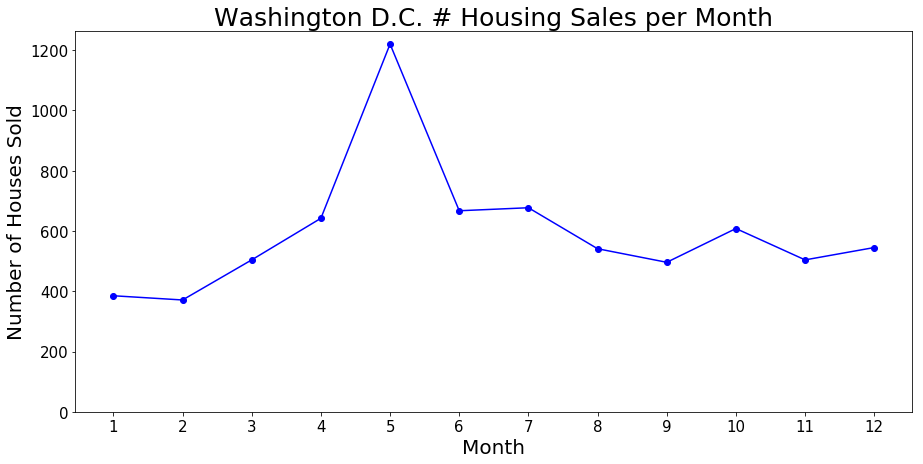

In [6]:
# Create figure to display housing sales per month for Washington D.C.
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(dc_sales.index, dc_sales.values, 'o-b')

# Set title and axis labels
ax.set_title("Washington D.C. # Housing Sales per Month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Number of Houses Sold", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize = 15)

# Show all months on x-axis and start graph at y=0
plt.xticks(dc_sales.index)
ax.set_ylim(bottom=0)

plt.show()

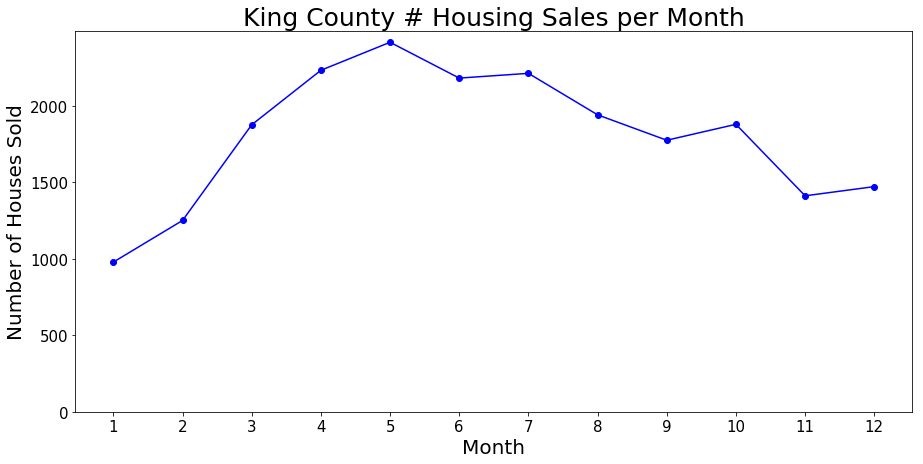

In [7]:
# Create figure to display housing sales per month for Washington D.C.
fig, ax = plt.subplots(figsize=(15, 7))
ax.plot(kc_sales.index, kc_sales.values, 'o-b')

# Set title and axis labels
ax.set_title("King County # Housing Sales per Month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel("Number of Houses Sold", fontsize=20)
ax.tick_params(axis='both', which='major', labelsize = 15)

# Show all months on x-axis and start graph at y=0
plt.xticks(kc_sales.index)
ax.set_ylim(bottom=0)

plt.show()

### Response:
By aggregating the housing sales by month for each data set, it highlights that selling in May is the most common for both geographical locations. It is interesting to note that in King County, the immediate months preceding and proceeding May are much closer to the peak number of houses sold compared to those months in Washington D.C. There is an obvious increase in sales in May, with the surrounding months dropping in sales significantly.

# Descriptive Statistics for Bedrooms, Bathrooms, Square Feet of Living, and Square Feet of Lot

In [8]:
# Grab bedrooms columns
dc_beds = dc_df.bedrooms
kc_beds = kc_df.bedrooms

## D.C. Bedrooms Stats

In [9]:
dc_beds.describe()

count    7160.000000
mean        2.556564
std         1.383210
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max        12.000000
Name: bedrooms, dtype: float64

In [10]:
dc_beds.value_counts().sort_index()

0      268
1     1463
2     1837
3     2007
4     1085
5      309
6      121
7       39
8       24
9        4
11       1
12       2
Name: bedrooms, dtype: int64

## King County Bedroom Stats

In [11]:
kc_beds.describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [12]:
kc_beds.value_counts().sort_index()

0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

### Response:
Looking at the bedroom value counts helps distinguish some interesting outliers. It appears that in King County, there is a housing unit that was sold with 33 bedrooms. There are only single cases where certain housing units had a significantly larger number of bedrooms, and I may leave this outlier out in the future. It is also worth noting that King County had an average of almost 1 more bedroom on average per house sale (which could be due to the outlier of the house with 33 bedrooms).

In [13]:
# Grab bathroom column
dc_baths = dc_df.bathrooms
kc_baths = kc_df.bathrooms

## D.C. Bathroom Stats

In [14]:
dc_baths.describe()

count    7160.000000
mean        2.167668
std         1.103428
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        11.500000
Name: bathrooms, dtype: float64

In [15]:
dc_baths.value_counts().sort_index()

0.0        2
1.0     2152
1.5      592
2.0     1450
2.5     1129
3.0      440
3.5      920
4.0      189
4.5      162
5.0       35
5.5       40
6.0       16
6.5       12
7.0       11
7.5        5
8.0        1
9.5        1
10.0       1
10.5       1
11.5       1
Name: bathrooms, dtype: int64

## King County Bathroom Stats

In [16]:
kc_baths.describe()

count    21613.000000
mean         2.114757
std          0.770163
min          0.000000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [17]:
kc_baths.value_counts().sort_index()

0.00      10
0.50       4
0.75      72
1.00    3852
1.25       9
1.50    1446
1.75    3048
2.00    1930
2.25    2047
2.50    5380
2.75    1185
3.00     753
3.25     589
3.50     731
3.75     155
4.00     136
4.25      79
4.50     100
4.75      23
5.00      21
5.25      13
5.50      10
5.75       4
6.00       6
6.25       2
6.50       2
6.75       2
7.50       1
7.75       1
8.00       2
Name: bathrooms, dtype: int64

## D.C. Living Square Feet Stats

In [18]:
# Grab sqft_living column
dc_living = dc_df.sqft_living
kc_living = kc_df.sqft_living

In [19]:
dc_living.describe()

count    7160.000000
mean     1715.277034
std       601.743189
min       576.000000
25%      1457.750000
50%      1715.277034
75%      1715.277034
max      9817.000000
Name: sqft_living, dtype: float64

In [20]:
kc_living.describe()

count    21613.000000
mean      2079.899736
std        918.440897
min        290.000000
25%       1427.000000
50%       1910.000000
75%       2550.000000
max      13540.000000
Name: sqft_living, dtype: float64

### Response:
In the D.C. data set, the mean sqft_living is around 1715 per house sold. This number is 300 feet smaller than the average size home sold in King County, with King County's average living square feet having a larger maximum and smaller minimum.

In [21]:
# Grab sqft_lot column
dc_lot = dc_df.sqft_lot
kc_lot = kc_df.sqft_lot

In [22]:
dc_lot.describe()

count     7160.000000
mean      1875.414106
std       2525.770408
min          0.000000
25%        410.000000
50%       1209.000000
75%       2276.500000
max      67805.000000
Name: sqft_lot, dtype: float64

In [23]:
kc_lot.describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean       15106.967566
std        41420.511515
min          520.000000
25%         5040.000000
50%         7618.000000
75%        10688.000000
max      1651359.000000
Name: sqft_lot, dtype: object

### Response:
It appears that the average lot size for housing units in King County was much lower than those in Washington D.C. There was a much larger range of property lot sizes found in King Country, ranging from 520 square feet up to 1651359 square feet. These could be large outliers to the rest of the data set, and is important to look into when building my model. Washington D.C. is a total of 61.05 square miles, whereas King County is 2,307 square miles. This leaves a lot more room for larger plots of land (such as farmland) to be sold.

# Condition and Grade Distribution
For context, condition refers to the overall quality or build of the house. The better the condition, the more well-maintained the housing unit is. Low condition scores means that the housing unit is approaching a condition needed for reconstruction. Grade, on the other hand, refers to the evaluation of the construction materials and level of craftsmanship used to build the house. The higher the score, the higher the quality. For example, a score of 13 (the highest score) is mansion-level.

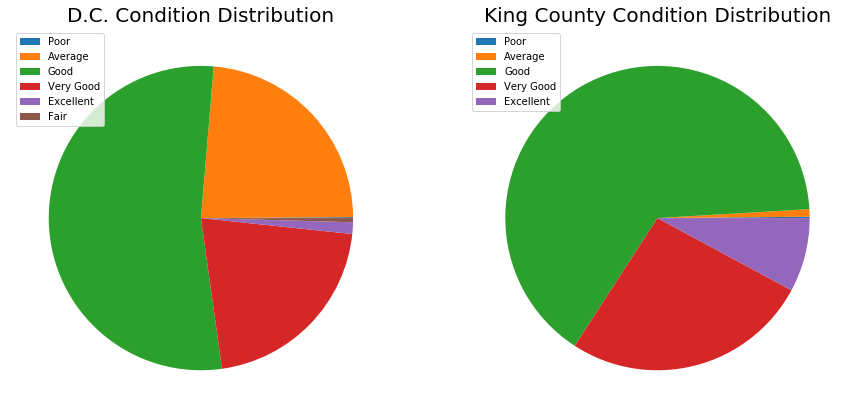

In [24]:
# Get D.C. and King County Condition
dc_labels = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent', 'Fair']
dc_conditions = dc_df[dc_df.condition != 'Missing'].condition.value_counts().reindex(dc_labels)

kc_labels = ['Poor', 'Average', 'Good', 'Very Good', 'Excellent']
kc_conditions = kc_df.condition.value_counts().reindex(kc_labels)

# Plot pie chart
fig = plt.figure(figsize=(15, 15))

# Pie chart for D.C. Condition
ax = fig.add_subplot(1, 2, 1)
ax.set_title('D.C. Condition Distribution', fontsize=20)
ax.pie(dc_conditions.values)
ax.legend(dc_conditions.index, loc='upper left')

# Pie chart for King County Condition
ax = fig.add_subplot(1, 2, 2)
ax.set_title('King County Condition Distribution', fontsize=20)
ax.pie(kc_conditions.values)
ax.legend(kc_conditions.index, loc='upper left')
plt.margins(x=0)

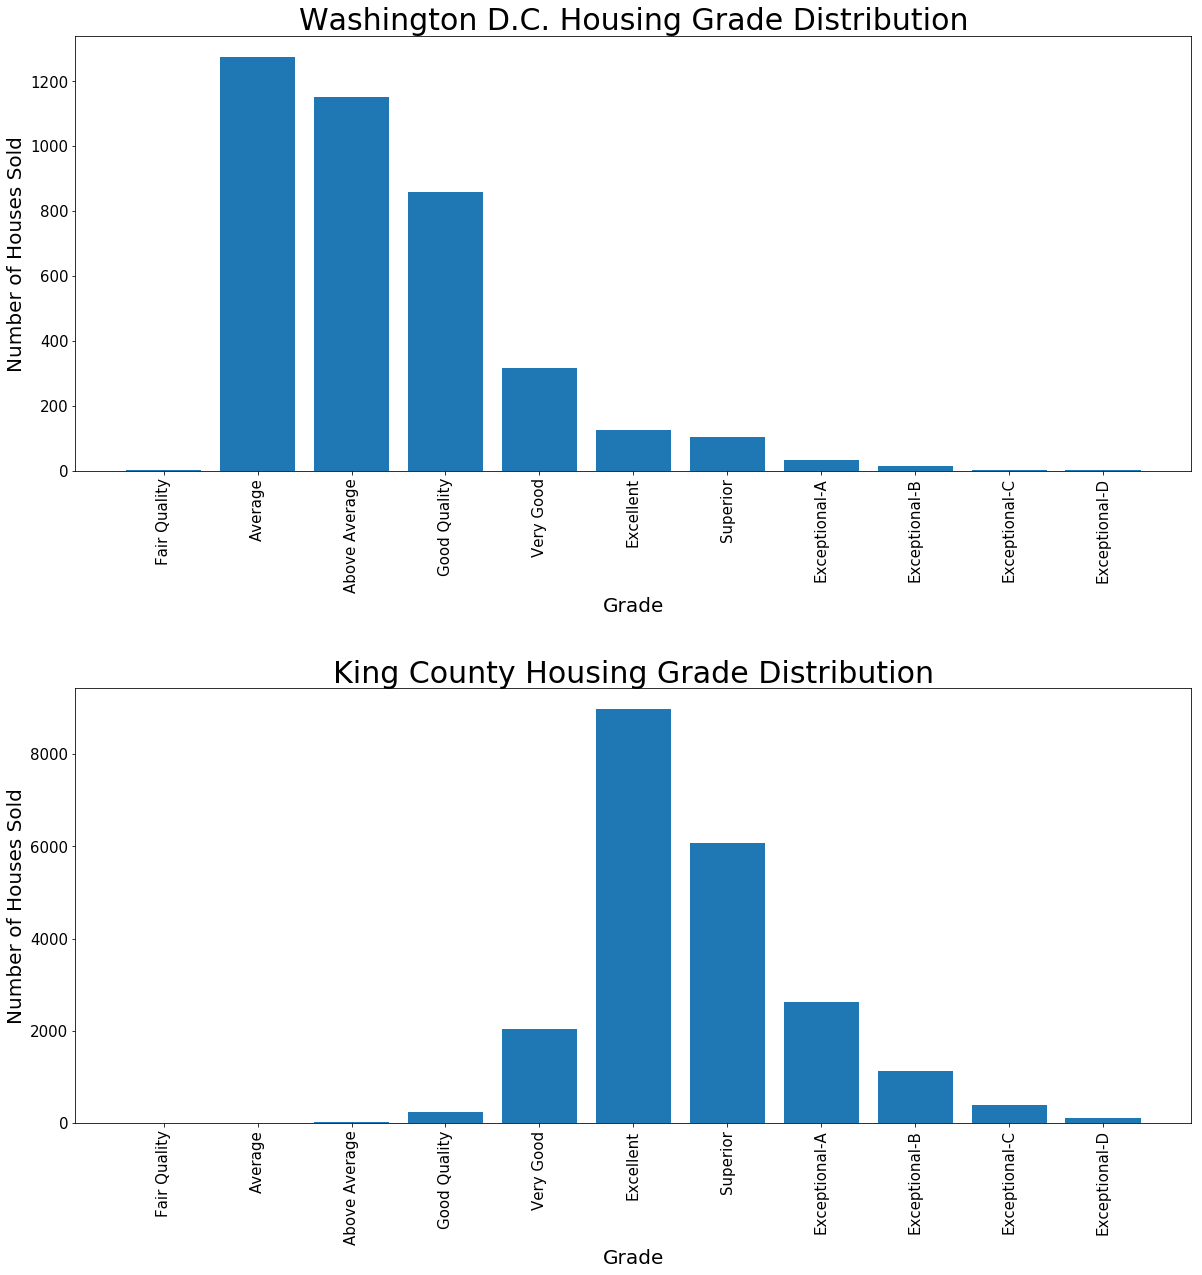

In [25]:
# Get D.C. and King County Grades
grade_labels = ['Fair Quality', 'Average', 'Above Average', 'Good Quality', 'Very Good', 'Excellent', 'Superior', 
              'Exceptional-A', 'Exceptional-B', 'Exceptional-C', 'Exceptional-D', 'Exceptional-D']
dc_grades = dc_df[dc_df.grade != 'Missing'].grade.value_counts().reindex(grade_labels)
kc_grades = kc_df.grade.value_counts().reindex(grade_labels)

# Plot pie chart
fig = plt.figure(figsize=(20, 20))

# Pie chart for D.C. Grades
ax = fig.add_subplot(2, 1, 1)
ax.set_title('Washington D.C. Housing Grade Distribution', fontsize=30)
ax.set_xlabel("Grade", fontsize=20)
ax.set_ylabel("Number of Houses Sold", fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
bar1 = ax.bar(grade_labels, dc_grades)
ax.set_xticklabels(grade_labels, rotation=90, ha='center')

# Pie chart for King County Grades
ax = fig.add_subplot(2, 1, 2)
ax.set_title('King County Housing Grade Distribution', fontsize=30)
ax.set_xlabel("Grade", fontsize=20)
ax.set_ylabel("Number of Houses Sold", fontsize=20)
ax.tick_params(axis = 'both', which = 'major', labelsize = 15)
bar1 = ax.bar(grade_labels, kc_grades)
ax.set_xticklabels(grade_labels, rotation=90, ha='center')

fig.subplots_adjust(hspace=.5)
plt.show()

### Response:
The two distributions really highlight some important housing quality features between Washington D.C. and King County. Firstly, King County has much less 'Average' condition houses sold and much more 'Good' condition houses sold compared to D.C. As a result, on average each house sold in King County was in better shape compared to those in D.C. Additionally, there is a clear visual distinction between the Washington D.C. Grade distribution and King County Grade distribution. Houses appear to be much nicer and high-end compared to those in Washington D.C. with majority of houses sold being graded either "Excellent" or "Superior" compared to the majority of Washington D.C. houses being either "Average" or "Above Average".

# House Ages

In [26]:
# Get house ages of each house sold, filtering houses that the year built is after the sell date
dc_age_df = dc_df[dc_df.yr_built > 0]
dc_age_df = dc_age_df[(pd.to_datetime(dc_age_df.date).dt.year - dc_age_df.yr_built) > 0]
kc_age_df = kc_df[(pd.to_datetime(kc_df.date).dt.year - kc_df.yr_built) > 0]

dc_house_ages = pd.to_datetime(dc_age_df.date).dt.year - dc_age_df.yr_built
kc_house_ages = pd.to_datetime(kc_age_df.date).dt.year - kc_age_df.yr_built

In [27]:
dc_house_ages.describe()

count    6887.000000
mean       70.924060
std        36.219839
min         1.000000
25%        50.000000
50%        78.000000
75%        99.000000
max       214.000000
dtype: float64

In [28]:
kc_house_ages.describe()

count    21171.000000
mean        44.222758
std         28.998107
min          1.000000
25%         19.000000
50%         41.000000
75%         63.000000
max        115.000000
dtype: float64

# Does condition affect the selling price?

### Washington D.C. prices based on condition

In [29]:
dc_conditions_df = dc_df.groupby(['condition']).mean().reindex(['Poor', 'Fair', 'Average', 'Good', 'Very Good', 'Excellent'])

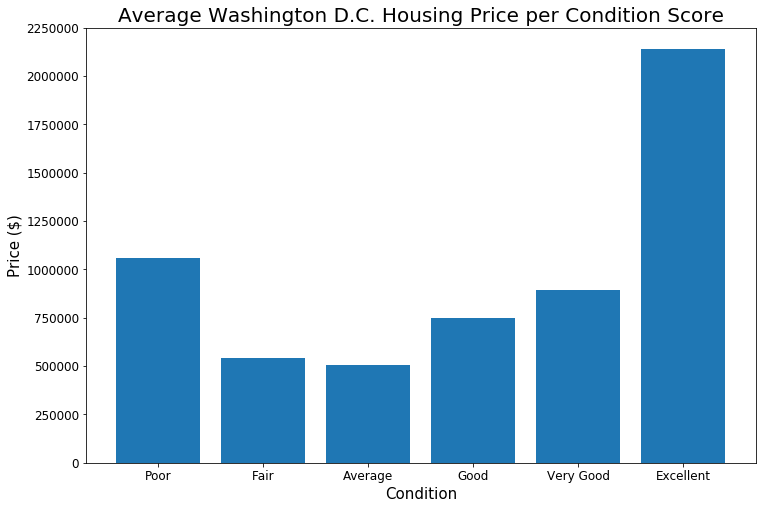

In [30]:
plt.figure(figsize=(12,8))
plt.bar(dc_conditions_df.index, dc_conditions_df.price)
plt.title("Average Washington D.C. Housing Price per Condition Score", fontsize=20)
plt.xlabel("Condition", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Price ($)", fontsize=15)
plt.show()

### King County prices based on condition

In [31]:
kc_conditions_df = kc_df.groupby(['condition']).mean().reindex(['Poor', 'Average', 'Good', 'Very Good', 'Excellent'])

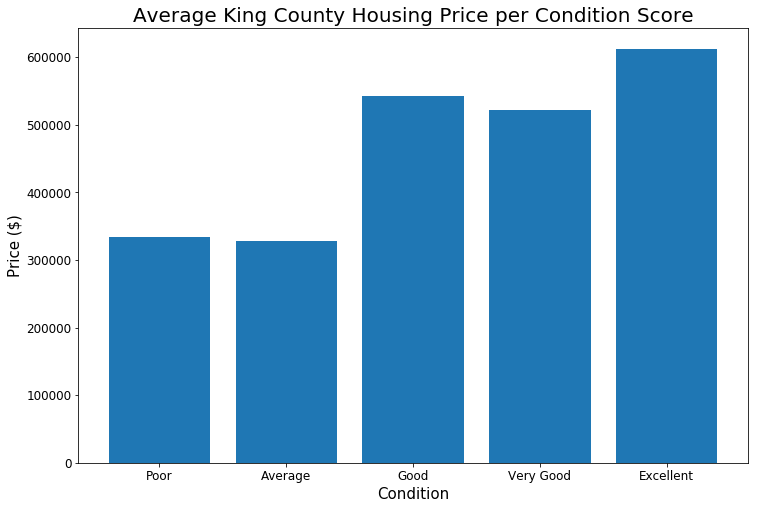

In [32]:
plt.figure(figsize=(12,8))
plt.bar(kc_conditions_df.index, kc_conditions_df.price)
plt.title("Average King County Housing Price per Condition Score", fontsize=20)
plt.xlabel("Condition", fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Price ($)", fontsize=15)
plt.show()

# Does grade affect the selling price?

### Washington D.C. prices based on grade

In [33]:
dc_grade_df = dc_df.groupby(['grade']).mean().reindex(grade_labels)

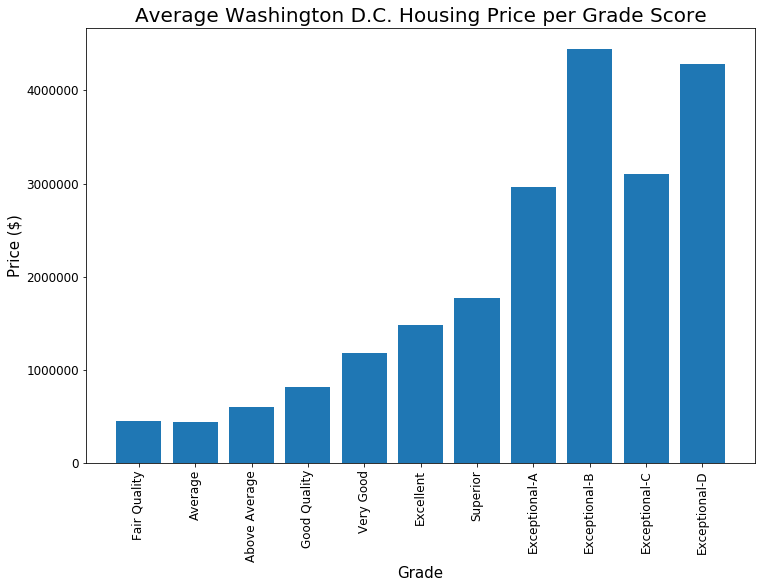

In [34]:
plt.figure(figsize=(12,8))
plt.bar(dc_grade_df.index, dc_grade_df.price)
plt.title("Average Washington D.C. Housing Price per Grade Score", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.ylabel("Price ($)", fontsize=15)
plt.show()

### King County prices based on grades

In [35]:
kc_grade_df = kc_df.groupby(['grade']).mean().reindex(grade_labels)

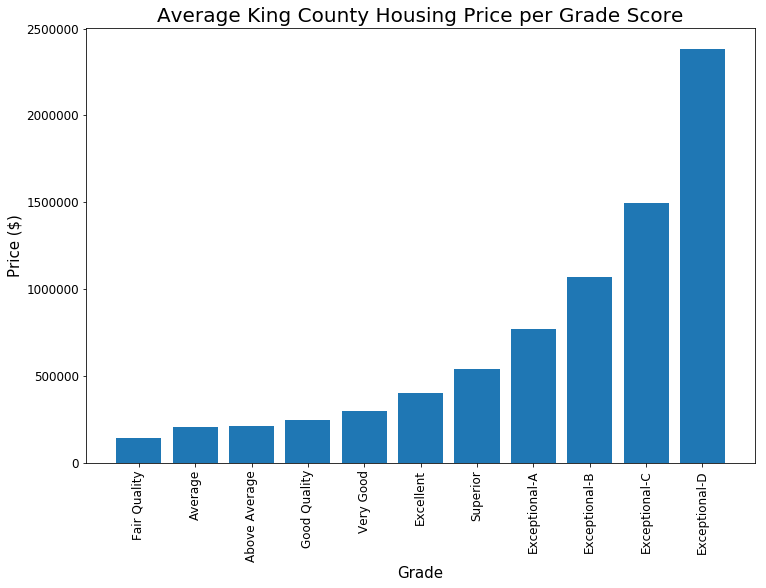

In [36]:
plt.figure(figsize=(12,8))
plt.bar(kc_grade_df.index, kc_grade_df.price)
plt.title("Average King County Housing Price per Grade Score", fontsize=20)
plt.xlabel("Grade", fontsize=15)
plt.xticks(fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.ylabel("Price ($)", fontsize=15)
plt.show()

# Correlation Matrix for Housing Features

In [37]:
# Convert categorical variables to dummies
def string_to_category(df):
    df["month"] = df["month"].astype('category').cat.codes
    f
    
    return df

dc_corr = dc_df.copy()
kc_corr = kc_df.copy()
dc_corr['month'] = pd.to_datetime(dc_corr['date']).dt.month
kc_corr['month'] = pd.to_datetime(kc_corr['date']).dt.month

dc_corr = string_to_category(dc_corr)
kc_corr = string_to_category(kc_corr)

In [38]:
# Code referenced from: 'https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec'
def create_corr(df, location):
    # Used to create a correlation matrix for the crime features
    corr = df.corr()
    fig, ax = plt.subplots(figsize=(15, 12))

    # Set correlation title
    ax.set_title("Correlation Matrix for " + location + " Housing Features", fontsize=25)

    # Create correlation matrix from seaborn heatmap
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        ax=ax,
        linewidths=0.5,
        annot=True,
        annot_kws={"fontsize":16},
        fmt='.2f'
    )

    # Set parameters for yticklabels
    ax.set_yticklabels(
        ax.get_yticklabels(),
        rotation=45,
        fontsize=15
    )

    # Add black border around correlation map
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        
    # Increase size of font for color bar label
    cbar = ax.collections[0].colorbar
    # here set the labelsize by 20
    cbar.ax.tick_params(labelsize=20)

    # Set parameters for xticklabels
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right',
        fontsize=15
    );

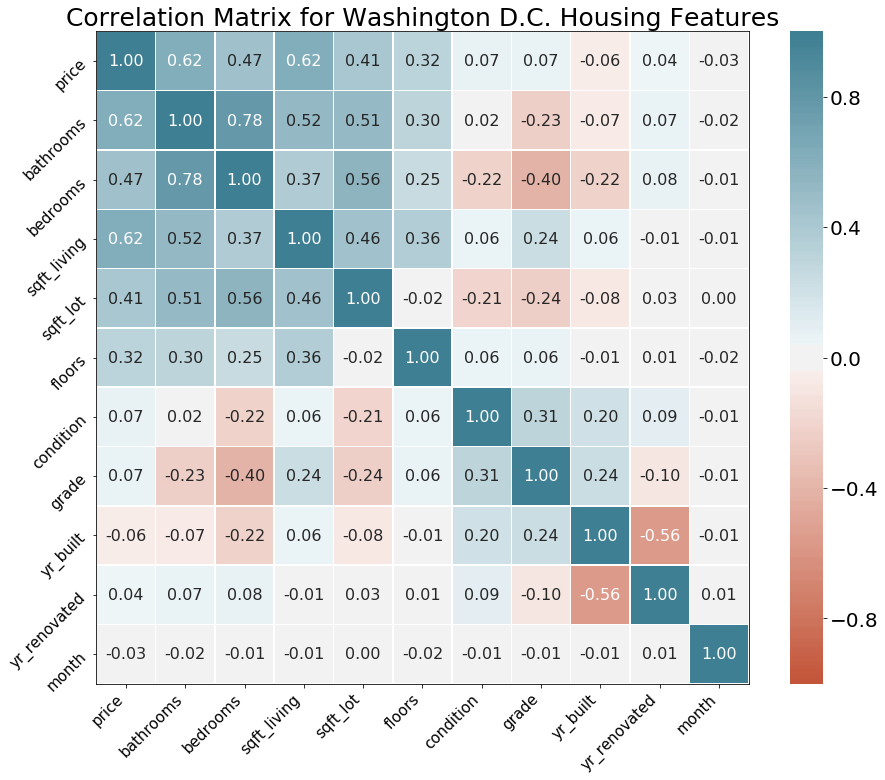

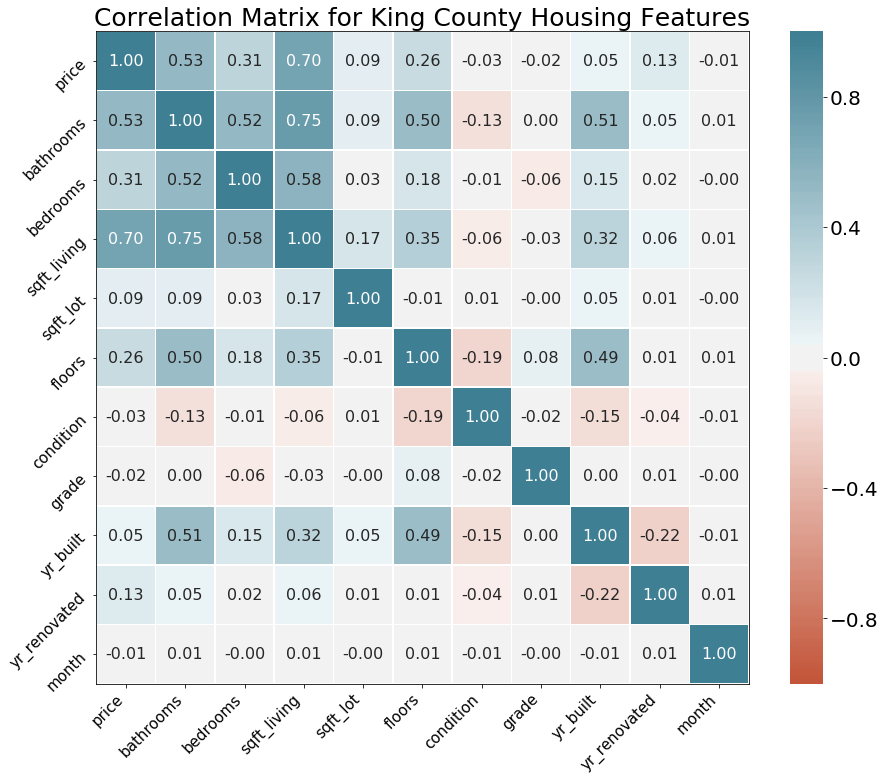

In [39]:
create_corr(dc_corr, "Washington D.C.")
create_corr(kc_corr, "King County")